<a href="https://colab.research.google.com/github/rajashekar/colab/blob/main/Week0_Regression_assignment_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Exercise shows how to use Google colab to apply regression models.**
**Copy the Colab notebook and data to your google drive before proceeding.**

Step 1: Connect Google drive that stores the data with your Google Colab Notebook

In [ ]:
import numpy as np
import numpy.matlib as matlib
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Replace the ID with ID of file you want to access. To get this ID: 

1.   Right-click on the name of the appropriate file in your Google Drive
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary argument of the call to `drive.CreateFile()` as the value associated with the 'id' key. Make sure that this value is a string.



In [ ]:
# Replace the ID with ID of file you want to access
# To get this ID, right-click on the name of the appropriate file in your 
downloaded = drive.CreateFile({'id':'18EFDQe9OI2jEfJWj3-Qq1MBoLWmhIDeq'}) 
downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

Step 2: Read the Data and verify its format!

In [ ]:
import pandas as pd
data = pd.read_csv('time_series_covid_19_confirmed.csv') 
print("The shape of data=",data.shape)
data.head()

The shape of data= (266, 225)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


Step 3: Original data has [266x225] dimensions. Let's use only 50 rows and 100 columns.

In [ ]:
# first we are only selecting first 50 countries and 100 days
rows=50
cols=100

# using numpy index location to get first 50 and 100 days
data_new=data.iloc[0:rows,4:cols+4]
print(data_new.shape)

(50, 100)


In [ ]:
#view the sub-sectioned data
data_new.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


Step 4: Convert the Tablular data to format {X,Y}, where X={Longitude, Latitude, Date}, Y={#infected}

In [ ]:
# Finding the date indices
import matplotlib.pyplot as plt
# Sum total cases for each country on all days
data_row=data_new.sum(axis=0)
# range from 0 to 50, for the sample we took
days=range(0,data_row.shape[0])
# using matlib to replicate matrix, 100 days range to 50 countries
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
# check shape
print(days_mat.shape)

(50, 100)


In [ ]:
# is 2 dimensional array with 50 rows and 100 days - currently filled with 0 to 99
days_mat

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [ ]:
# Let's create data X-{X1,X2,X3}, where X1=lat, X2=long, X3=date
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))

In [ ]:
X

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
X.shape

(5000, 3)

In [ ]:
# Y=#affected
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))

In [ ]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
Y.shape

(5000, 1)

In [ ]:
lat_long=np.array(data.iloc[:,2:4])
lat_long.shape

In [ ]:
# converting pandas to numpy array
data_new = np.array(data_new)

In [ ]:
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1))) # number of infected cases on that day

In [ ]:
# At this point we have lat & long and date is 0 - 99
X

array([[ 33.93911 ,  67.709953,   0.      ],
       [ 33.93911 ,  67.709953,   1.      ],
       [ 33.93911 ,  67.709953,   2.      ],
       ...,
       [ 46.5107  , -63.4168  ,  97.      ],
       [ 46.5107  , -63.4168  ,  98.      ],
       [ 46.5107  , -63.4168  ,  99.      ]])

In [ ]:
print(np.shape(X))
#Data Preparation is Done!

(5000, 3)


In [ ]:
# Y has the number of infected for 10 days
Y

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [27.],
       [27.],
       [27.]])

Step 5: Let's Plot the Data to see the converted Data format!

Text(0, 0.5, 'Number Infected')

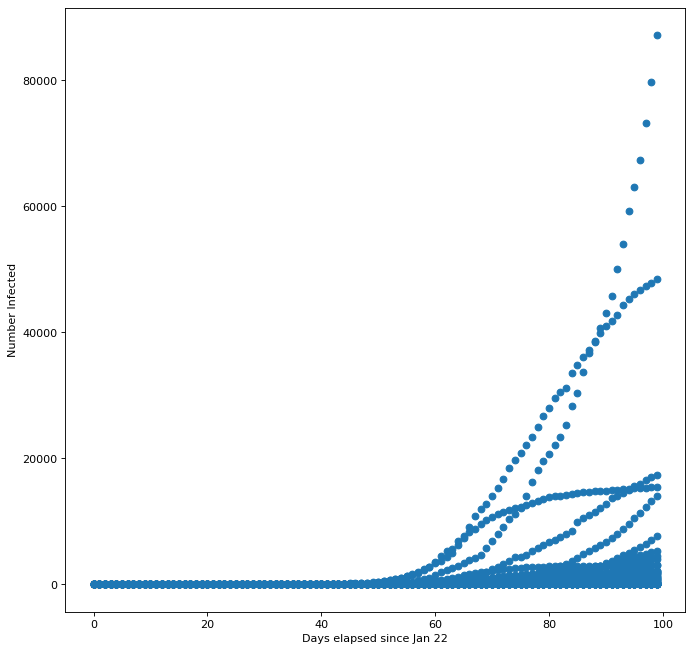

In [ ]:
# here we are ploting using matplot lib
plt.figure(figsize=(10, 10), dpi=80)
# Here at X[:, 2] has days
# And Y has infected cases for each day 
plt.scatter(X[:,2],Y[:])
# label x axis
plt.xlabel('Days elapsed since Jan 22')
# label y axis
plt.ylabel('Number Infected')

Step 6: Let's spilt the data to training and test (70% train, 30% test)

In [ ]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train (70%) and test (30%)
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
# first checking using linear regression without ploynomial features
from sklearn.linear_model import LinearRegression

# Transform both the train and test data
clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train_1, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

Linear Regression Coefficients are= [[ 4.99043038 -1.8607295  34.64281024]]
constant coefficient= [-960.19930415]


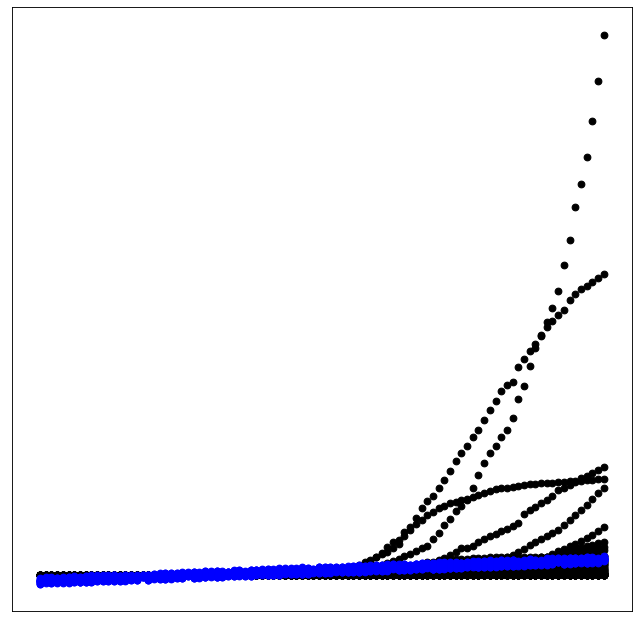

In [ ]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test_1)
# next plot predictions
plt.figure(figsize=(10, 10), dpi=80)
# this will plot the actual values
plt.scatter(X[:,2], Y[:,0],  color='black')
# this will plot the redictions
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Checking the linear regression, MSE

from sklearn.metrics import mean_squared_error as mse
print(mse(y_test, y_pred))

23711527.61192565


Step 7: Let's fit Polynomial features of degree 3 to the features. This results in dimensions going from 3 to 20!

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# If you have features [a, b, c] the default polynomial features(in sklearn the degree is 2) 
# should be [1, a, b, c, a^2, b^2, c^2, ab, bc, ca].
poly = PolynomialFeatures(degree=2)

# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (1500, 10)
Linear Regression Coefficients are= [[ 0.00000000e+00 -3.04639346e+01  1.57150100e+00 -5.16404560e+01
   9.84814802e-01  2.49228501e-01  1.82133025e-01 -3.06346055e-02
  -9.44788647e-02  8.57060115e-01]]
constant coefficient= [233.2548977]


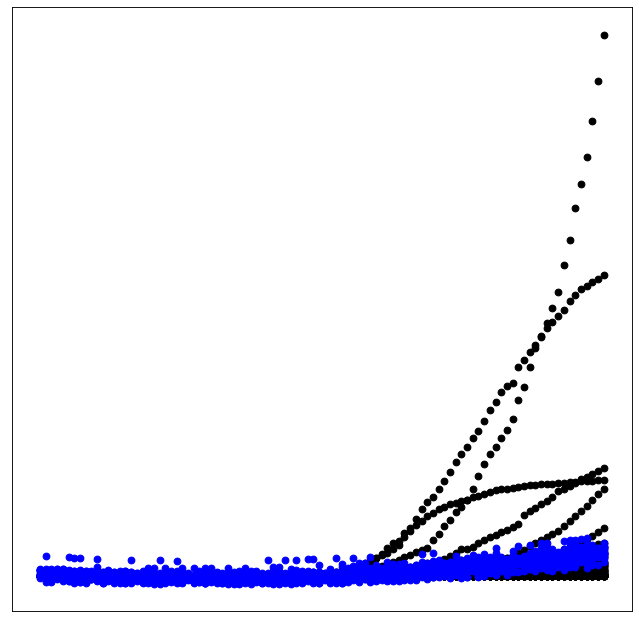

In [52]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

In the image above, black points are training and blue ones are test!

In [53]:
# this is with degree 2
print(mse(y_test, y_pred))

22409841.314146668


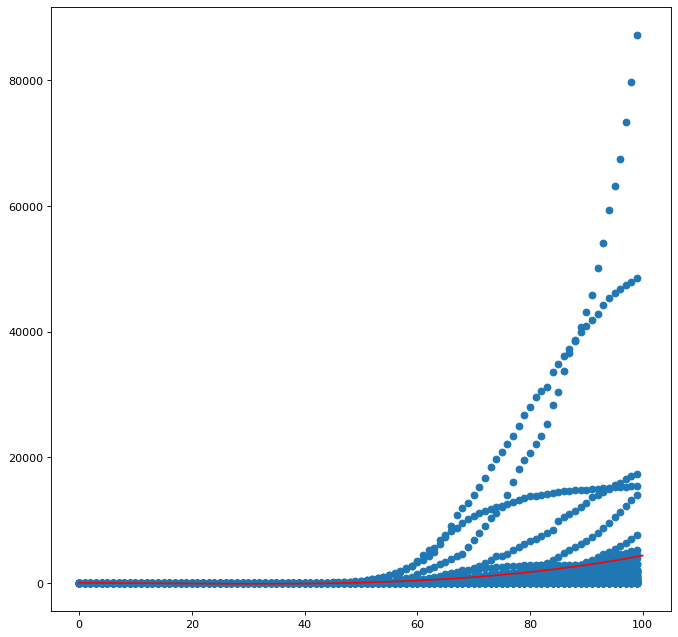

In [54]:
# 1D polynomial regression
model = np.poly1d(np.polyfit(np.transpose(X_train_1[:,2]), np.transpose(y_train[:,0]), 3))

model_x = np.linspace(0, 100, 100)
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.plot(model_x, model(model_x),'r')
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error as mse

# Trying to find the best degree that can fit this
degrees = []
degree_preds = []

for d in range(3,30):
  poly = PolynomialFeatures(degree=d)
  X_train = poly.fit_transform(X_train_1)
  X_test = poly.fit_transform(X_test_1)
  clf = LinearRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  mse_error = mse(y_test, y_pred)

  degrees.append(d)
  degree_preds.append(mse_error)

  print("{} - {}".format(d,mse_error))

3 - 20560548.002745174
4 - 18150800.781314142
5 - 14193417.434568288
6 - 9116090.38274086
7 - 4553747.836499233
8 - 1647485.2115973923
9 - 852998.2341865832
10 - 292411.1100162412
11 - 165820.39517135787
12 - 59911.08382956289
13 - 42823.76465792344
14 - 48262.20936478409
15 - 28638.23167982166
16 - 53084.888326286135
17 - 147700.7860421502
18 - 32719.992937412386
19 - 63681.47360981373
20 - 26729.058065548877
21 - 349950.08880734676
22 - 22501.501182992826
23 - 34929.47441706763
24 - 97816.57770476092
25 - 60737.26552235832
26 - 73631.27621647748
27 - 1311600.8364136056
28 - 836658.5754937717
29 - 4590416.3280961


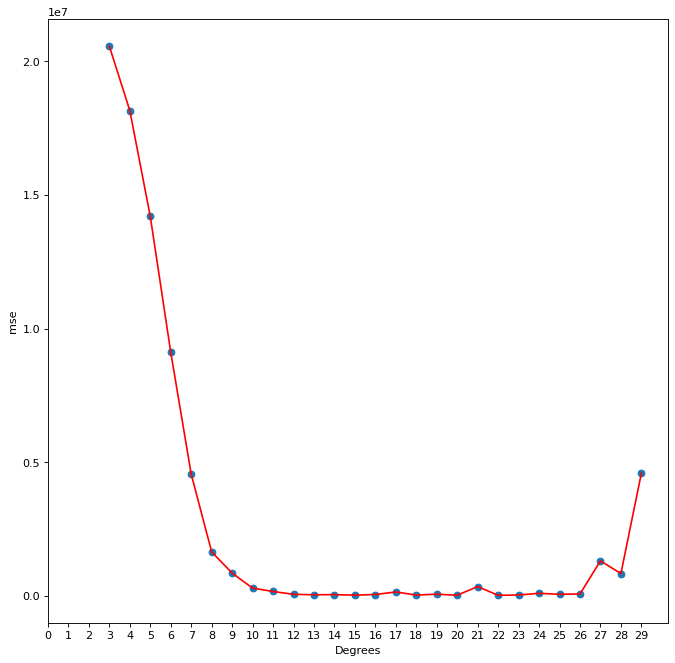

In [71]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(degrees,degree_preds)
plt.plot(degrees,degree_preds,'r')

# label x axis
plt.xlabel('Degrees')
# label y axis
plt.ylabel('mse')
plt.xticks(np.arange(0, 30, 1))
plt.show()

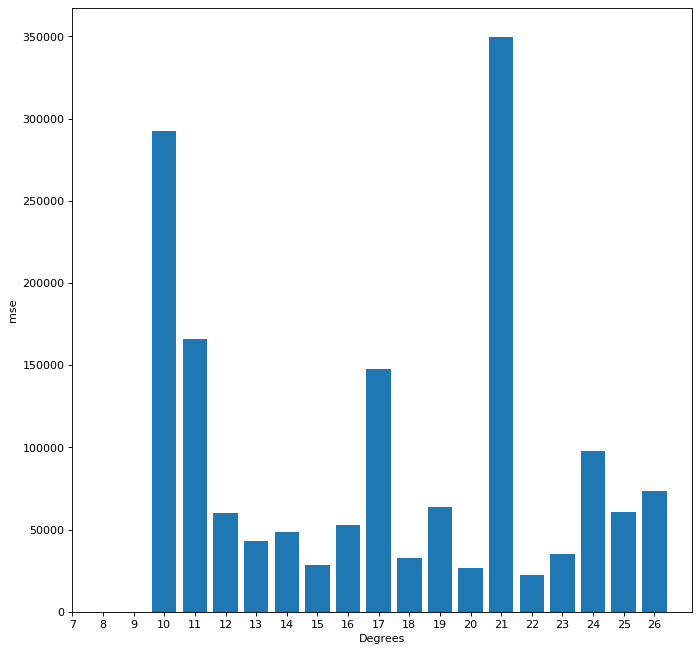

In [83]:
plt.figure(figsize=(10, 10), dpi=80)
plt.bar(degrees[7:24],degree_preds[7:24])

# label x axis
plt.xlabel('Degrees')
# label y axis
plt.ylabel('mse')
plt.xticks(np.arange(7, 27, 1))
plt.show()

New shape of test data= (1500, 2300)


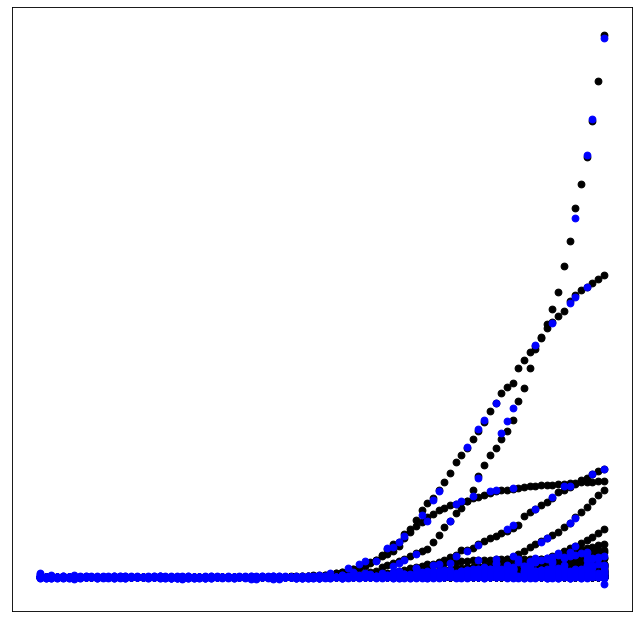

In [85]:
poly = PolynomialFeatures(degree=22)

# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

# **Summary and Discussion (10-15 min session at end of Assignment)**
## This exercise is meant to get us all acquainted with Google colab, porting data from google drive to colab and visualizing outcomes. At the end, discuss the following:
1.  Are there any other ways of pre-processing the data with pandas? What commands would you use?
2. How would you optimize the process? i.e. How would you ensure best fit polynomial regresison is selected. Think of the process/steps. 
3. What does the output metric tell you? Can you gauge over-prediction and udner predictions?


In [ ]:
#Assignment: Report the mean squared error for prediction using differnt degrers of Polynomial Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#1. Report the best model for this data
From above I see that with ploynomial degree 22 we got less mse

#2. Repeat for complete data (Change step 3) and report the best model
# Predict regression outcome on test data
When did for the complete set also degree 22 did got best model


In [86]:
# getting all rows
data_new=data.iloc[:,4:]
data_new.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [87]:
data_row=data_new.sum(axis=0)
days=range(0,data_row.shape[0])
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
print(days_mat.shape)

(266, 221)


In [88]:
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new=np.array(data_new)
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1))) # number of infected cases on that day

In [89]:
print(np.shape(X))
#Data Preparation is Done

(58786, 3)


In [90]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)


In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=22)
# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (17636, 2300)
Linear Regression Coefficients are= [[ 1.70925646e-33  2.49769115e-33 -1.78578896e-34 ...  9.75873180e-43
  -3.06283441e-44  1.16544447e-42]]
constant coefficient= [5587.94012476]


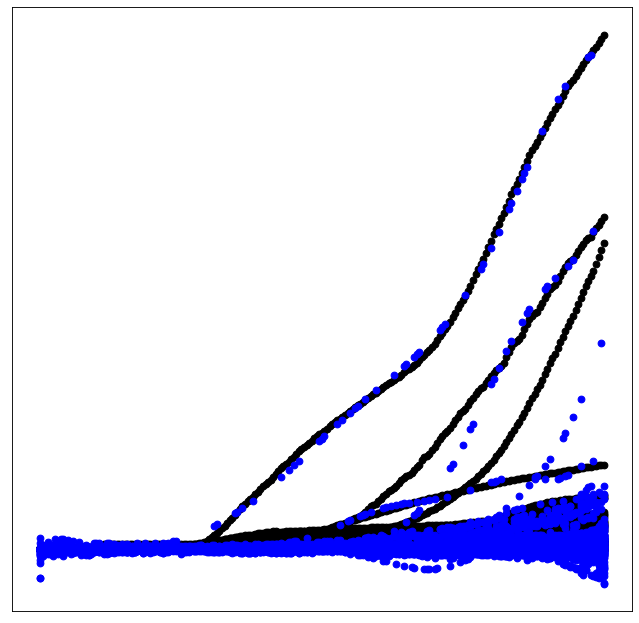

In [92]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

1. Are there any other ways of pre-processing the data with pandas? What commands would you use?
> Might be we can use Panda Series 

2. How would you optimize the process? i.e. How would you ensure best fit 
polynomial regresison is selected. Think of the process/steps.
> We can use a loop to find which degree has minimal mean squared error. 

3. What does the output metric tell you? Can you gauge over-prediction and udner predictions?
> if mse is more than the predictions are far away (over prediction) from actual values, if its small then its nearer to the actual vales.